# Avaliação 1->
# 1 Definição do problema
# 2 carregamento dos dados
# 3 Seleção das variaveis

# 1 Definição do problema
predição do consumo de energia levando em conta a temperatura e umidade que estar sendo medida através de sensores (iot)

Este projeto de Internet das Coisas (IoT) tem como principal propósito a criação de modelos preditivos para antecipar o consumo de energia de diversos aparelhos elétricos. Para esse fim, serão utilizados dados provenientes de múltiplas fontes, incluindo medições de sensores que monitoram temperatura e umidade em uma rede sem fio, informações de previsão meteorológica provenientes de uma estação localizada em um aeroporto, bem como dados sobre o consumo de energia por lâmpadas.

Nesse projeto de aprendizado de máquina, a etapa inicial consistirá em realizar uma filtragem dos dados, eliminando parâmetros que não possuem poder preditivo e selecionando os melhores recursos para a previsão.

Os dados foram coletados ao longo de um período de aproximadamente cinco meses, com medições realizadas a cada dez minutos. Para monitorar as condições de temperatura e umidade na residência, foi utilizada uma rede de sensores sem fio baseada na tecnologia ZigBee. Cada nó sem fio transmitia informações sobre a temperatura e umidade a cada três minutos, e posteriormente, uma média desses dados foi calculada em intervalos de dez minutos. Paralelamente, os registros de consumo de energia foram feitos a cada dez minutos através de medidores de energia específicos.

Os dados meteorológicos, obtidos da estação mais próxima ao aeroporto de Chievres, na Bélgica, foram adquiridos de uma fonte pública chamada Reliable Prognosis 

O objetivo central deste projeto é desenvolver um modelo preditivo capaz de estimar o consumo de energia com base nos dados coletados através dos sensores IoT mencionados.

Os conjuntos de dados de treino e de teste estão em anexo.

# 2 carregamento dos dados

In [2]:

import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib as plt


In [13]:
df_teste = pd.read_csv('dataset_testing.csv',sep = ',')
df_treino = pd.read_csv('dataset_training.csv',sep = ',') 

In [38]:
df = pd.concat([df_teste,df_treino])
df = df.sort_values(['date'], ascending=True)

In [39]:
# Definindo a variavel date como Index do Dataset. 
df.index = df['date']
df = df.drop('date', 1)
df.head(5)

C:\Users\andre\AppData\Local\Temp\ipykernel_10212\4102944697.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('date', 1)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000,Weekday,Monday
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday


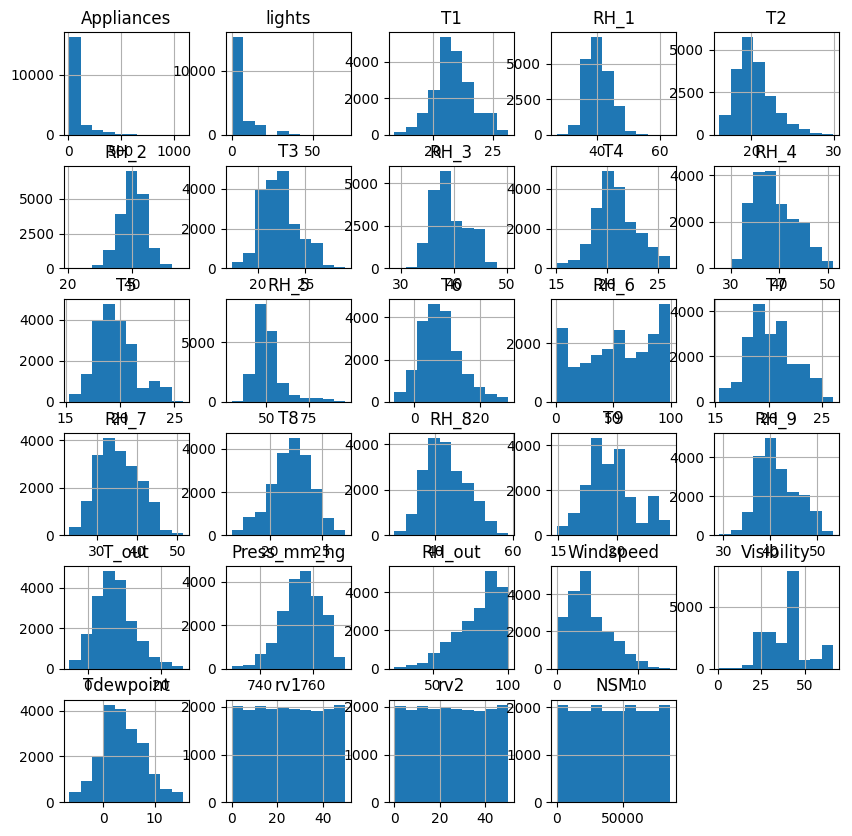

In [40]:
df.hist(figsize=(10,10));

# 3 Seleção das variaveis

In [7]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

T > Temperatura

RH > Umidade Relativa (Relative Humidity)

T_out > Temperatura do lado de fora da casa

RH_out > Umidade do lado de fora da casa

mm_hg > Unidade de pressão 

lights/luminárias > qtd de pontos de iluminação ativos no momento da medição

appliances/eletrodomésticos > qtd de eletrodomésticos ativos no momento da medição

# As variaveis que não servem para a predição inicialmente e que serão apagadas do dataset foram as 'Windspeed','Visibility','Tdewpoint','rv2'.

In [42]:
df.drop(['Windspeed','Visibility','Tdewpoint','rv2'],1)

C:\Users\andre\AppData\Local\Temp\ipykernel_10212\3965851693.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Windspeed','Visibility','Tdewpoint','rv2'],1)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,rv1,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,13.275433,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,18.606195,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,28.642668,62400,Weekday,Monday
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,45.410389,63000,Weekday,Monday
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,10.084097,63600,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,43.096812,62400,Weekday,Friday
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,49.282940,63000,Weekday,Friday
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,29.199117,63600,Weekday,Friday
